In [8]:
import numpy as py
import pandas as pd
import csv
from operator import attrgetter
from sklearn import preprocessing
import statistics
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#createclasshumantoeasymanagethedata
class human:
    def __init__(self,number, Prgn, Glcs, bp, St, Is, BMI, Dpf, Age, Outcome):
        self.number = number
        self.Prgn = Prgn
        self.Glcs = Glcs
        self.bp = bp
        self.St = St
        self.Is = Is
        self.BMI = BMI
        self.Dpf = Dpf
        self.Age = Age
        self.Oc = Outcome

    def __repr__(self):
        return repr((self.Prgn,self.Glcs,self.bp,self.St,self.Is,self.BMI,self.Dpf,self.Age,self.Oc))

In [9]:
#ReadDatasetsFromCSV
dt_sets = pd.read_csv("Diabetes.csv")
dt_sets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
#PrapemrosesanData
def pra_data(data):
    data.info()
    for column in data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]:
        data[column]= data[column].replace(0,py.NaN)
        med = int(data[column].median(skipna=True))
        data[column]=data[column].replace(py.NaN,med)
    data["Pregnancies"] = (data["Pregnancies"] - data["Pregnancies"].min()) / (data["Pregnancies"].max() - data["Pregnancies"].min())
    data["Glucose"] = (data["Glucose"] - data["Glucose"].min()) / (data["Glucose"].max() - data["Glucose"].min())
    data["BloodPressure"] = (data["BloodPressure"] - data["BloodPressure"].min()) / (data["BloodPressure"].max() - data["BloodPressure"].min())
    data["SkinThickness"] = (data["SkinThickness"] - data["SkinThickness"].min()) / (data["SkinThickness"].max() - data["SkinThickness"].min())
    data["Insulin"] = (data["Insulin"] - data["Insulin"].min()) / (data["Insulin"].max() - data["Insulin"].min())
    data["BMI"] = (data["BMI"] - data["BMI"].min()) / (data["BMI"].max() - data["BMI"].min())
    data["DiabetesPedigreeFunction"] = (data["DiabetesPedigreeFunction"] - data["DiabetesPedigreeFunction"].min()) / (data["DiabetesPedigreeFunction"].max() - data["DiabetesPedigreeFunction"].min())
    data["Age"] = (data["Age"] - data["Age"].min()) / (data["Age"].max() - data["Age"].min())
    return data

dt_sets = pra_data(dt_sets)
dt_sets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333,1


In [11]:
#SplitIntoFiveSubsets
#createNewDataset1
def dataset_new1(data_set,tr_set1,tst1):
    for i in range(len(data_set)):
        if(i in range(0,614)):
            tr_set1.append(data_set[i])
        else:
            tst1.append(data_set[i])
#createNewDataset2
def dataset_new2(data_set,tr_set2,tst2):
    for i in range(len(data_set)):
        if (i in range(0,461) or i in range(614,768)):
            tr_set2.append(data_set[i])
        else:
            tst2.append(data_set[i])
#createNewDataset3
def dataset_new3(data_set,tr_set3,tst3):
    for i in range(len(data_set)):
        if (i in range(0,307) or i in range(461,768)):
            tr_set3.append(data_set[i])
        else:
            tst3.append(data_set[i])
#createNewDataset4
def dataset_new4(data_set,tr_set4,tst4):
    for i in range(len(data_set)):
        if (i in range(0,154) or i in range(307,768)):
            tr_set4.append(data_set[i])
        else:
            tst4.append(data_set[i])
#createNewDataset5
def dataset_new5(data_set,tr_set5,tst5):
    for i in range(len(data_set)):
        if (i in range(154,768)):
            tr_set5.append(data_set[i])
        else:
            tst5.append(data_set[i])

In [12]:
#Distance Count With Manhattan Distance
def manhattan_distance(train_set,test_set):
    sum = abs(train_set.Prgn - test_set.Prgn) + abs(train_set.Glcs - test_set.Glcs) + abs(train_set.bp - test_set.bp) + abs(train_set.St - test_set.St) + abs(train_set.Is - test_set.Is) + abs(train_set.BMI - test_set.BMI) + abs(train_set.Dpf - test_set.Dpf) + abs(train_set.Age - test_set.Age)
    return sum


In [13]:
#KlasifikasiKNN
def classification_KNN(train_set,test_set,k):
    pred = []
    actual = []
    for j in range(len(test_set)):
        tmp_dt = []
        bgtmp_dt = []
        for i in range(len(train_set)):
            dist = manhattan_distance(train_set[i],test_set[j])
            tmp_dt.append([dist,train_set[i].Oc])
        tmp_dt.sort()
        for x in range(k):
            bgtmp_dt.append(tmp_dt[x][1])
        vote_result = Counter(bgtmp_dt).most_common(1)
        pred.append(vote_result[0][0])
        actual.append(test_set[j].Oc)
    score = accuracy_score(pred,actual) 
    return score

In [7]:
#findthebestK
def best_k(arr_avgk):
    best = max(arr_avgk)
    print("Nilai K terbaik adalah",best[1])
    print("Dengan nilai rata rata akurasi",best[0])

In [19]:
#mainKNNProgram
tr_set1 = []
tst1 = []
tr_set2 = []
tst2 = []
tr_set3 = []
tst3 = []
tr_set4 = []
tst4 = []
tr_set5 = []
tst5 = []
arr_data = []
actual = []
#transferalldata_setfromcsvtoarray
for i in range (len(dt_sets)):
    arr_data.append(human(i+1,dt_sets["Pregnancies"][i],dt_sets["Glucose"][i],dt_sets["BloodPressure"][i],dt_sets["SkinThickness"][i],dt_sets["Insulin"][i],dt_sets["BMI"][i],
    dt_sets["DiabetesPedigreeFunction"][i],dt_sets["Age"][i],dt_sets["Outcome"][i]))
    
#SplitDataintonewdatasetCreate
dataset_new1(arr_data,tr_set1,tst1)
dataset_new2(arr_data,tr_set2,tst2)
dataset_new3(arr_data,tr_set3,tst3)
dataset_new4(arr_data,tr_set4,tst4)
dataset_new5(arr_data,tr_set5,tst5)


#CountAverageAccurationkNNwith5-fold cross-validation
avg = []
arr_avgK = []
for i in range(1,41):
    kNN_one = classification_KNN(tr_set1,tst1,i)
    kNN_two = classification_KNN(tr_set2,tst2,i)
    kNN_three = classification_KNN(tr_set3,tst3,i)
    kNN_four = classification_KNN(tr_set4,tst4,i)
    kNN_five = classification_KNN(tr_set5,tst5,i)
    avg_kNN = ((kNN_one + kNN_two + kNN_three + kNN_four + kNN_five)/5)*100
    print("Nilai K ",i)
    print("Rata - Rata Akurasi kNN",avg_kNN)
    avg.append(avg_kNN)

#findthebestkfromkNN
kforplot = []
for i in range(len(avg)):
    kforplot.append(i+1)
    arr_avgK.append([avg[i],[i+1]])

Nilai K  1
Rata - Rata Akurasi kNN 70.3098208980562
Nilai K  2
Rata - Rata Akurasi kNN 70.3098208980562
Nilai K  3
Rata - Rata Akurasi kNN 71.87335540276717
Nilai K  4
Rata - Rata Akurasi kNN 72.26211696799932
Nilai K  5
Rata - Rata Akurasi kNN 74.86715898480605
Nilai K  6
Rata - Rata Akurasi kNN 74.60911637382226
Nilai K  7
Rata - Rata Akurasi kNN 74.60826754944402
Nilai K  8
Rata - Rata Akurasi kNN 74.60911637382226
Nilai K  9
Rata - Rata Akurasi kNN 75.64722858840507
Nilai K  10
Rata - Rata Akurasi kNN 75.25676937441645
Nilai K  11
Rata - Rata Akurasi kNN 75.38579067990833
Nilai K  12
Rata - Rata Akurasi kNN 76.5622612681436
Nilai K  13
Rata - Rata Akurasi kNN 76.5571683218742
Nilai K  14
Rata - Rata Akurasi kNN 77.0808929632459
Nilai K  15
Rata - Rata Akurasi kNN 77.21076309311601
Nilai K  16
Rata - Rata Akurasi kNN 76.69043374925727
Nilai K  17
Rata - Rata Akurasi kNN 76.68873610050082
Nilai K  18
Rata - Rata Akurasi kNN 76.95017400899754
Nilai K  19
Rata - Rata Akurasi kNN 75.515

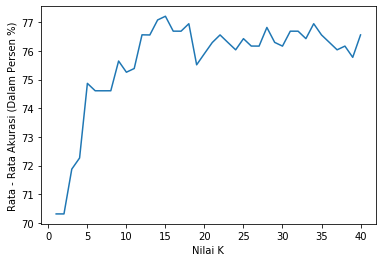

Nilai K terbaik adalah [15]
Dengan nilai rata rata akurasi 77.21076309311601


In [23]:
plt.plot(kforplot,avg)
plt.ylabel('Rata - Rata Akurasi (Dalam Persen %)')
plt.xlabel('Nilai K')
plt.show()
best_k(arr_avgK)